<a href="https://colab.research.google.com/github/shubhu1026/AI-ML/blob/main/Shubham_Patel_Q_Learning_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        # Name: Shubham Patel                                           
        # Student Number: n01624539

## Lab 6 : Reinforcement Learning

# The Problem statement

Consider a robot that picks and drops ordered items a fullfilment store (warehouse). Each object has a location, which will also be the starting location of the robot and from there it will find the best path to carry the object to the packaging area. There are obstacles in the path and there is going to be a penalty (negative reward) if the robot bumps into the obstacle. Also the object has to reach the packaging area in minimum amount of time, so there is a very small negative reward for every step it takes. The environment is shown below.


# The Environment

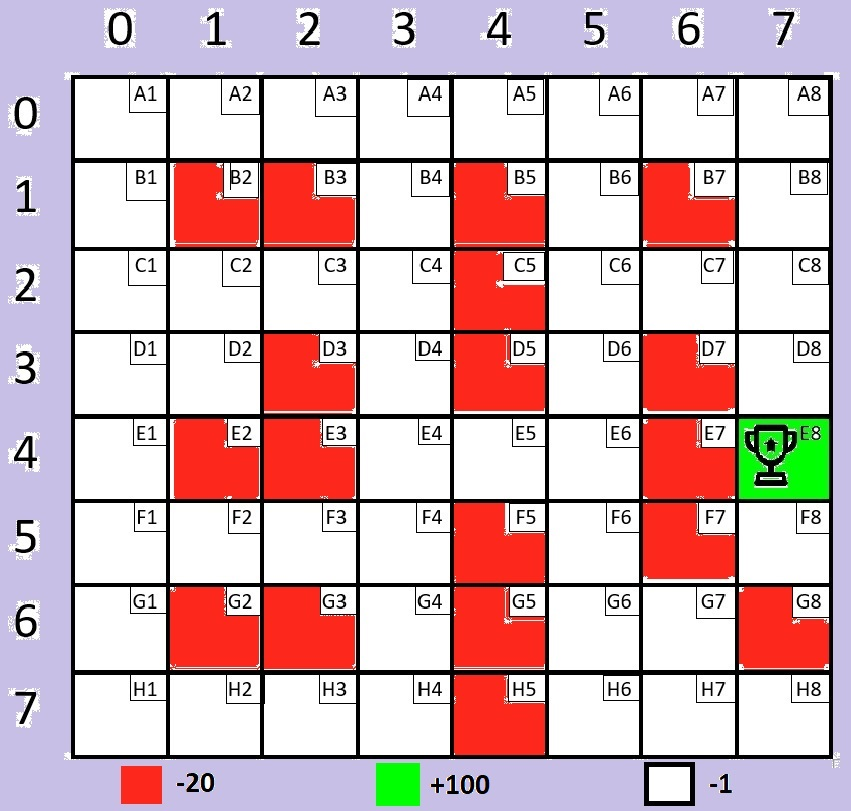

# Detailed Environment Description



*   The total environment is divided into a grid of 8 by 8. So there are 8 rows and 8 columns.


*   Those rows and columns are indexed from 0 to 7 as shown in the left and top of figure. These indices are also used in the code to help traversing using loops.

*   But every cell in the grid is also given a code name. These code names are shown in top right corner of every cell. The names start from A1, A2…… A8 for first row and so on.


*   The red cells are the one’s which are forbidden for the robot. If it bumps into this red area, then there is a rewards of -20 as shown in the bottom.
*   From information given in the bottom, it is also clear that reaching the target at Cell E8 which is at index (4,7) has a reward of 100 (that’s where the packaging area is) and the robot is allowed to move along all the white cells which has a reward of -1.


*   This negative reward of -1 will motivate the robot to hurry up.


# Do the below tasks to automate the best Robot Route using Q Learning

In [ ]:
# Import the appropriate libraries
import numpy as np
import random

In [ ]:
# Create a Map of the rewards for warehouse
grid_size = (8, 8)

R = np.full(grid_size, -1)

obstacles = [(1,1), (1,2), (3,2), (4,1), (4,2), (6,1), (6,2), (1,4), (2,4), (3,4), (5,4), (6,4), (7,4), (1,6), (3,6), (4,6), (5,6), (6,7)]
goal = (4,7)

for row, col in obstacles:
    R[row, col] = -20

R[goal] = 100

print(R)

[[ -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1 -20 -20  -1 -20  -1 -20  -1]
 [ -1  -1  -1  -1 -20  -1  -1  -1]
 [ -1  -1 -20  -1 -20  -1 -20  -1]
 [ -1 -20 -20  -1  -1  -1 -20 100]
 [ -1  -1  -1  -1 -20  -1 -20  -1]
 [ -1 -20 -20  -1 -20  -1  -1 -20]
 [ -1  -1  -1  -1 -20  -1  -1  -1]]


In [ ]:
actions = {
    "left": (0, -1),
    "right": (0, 1),
    "up": (-1, 0),
    "down": (1, 0)
}

In [ ]:
# Declare all your variables here
gamma = 0.75
alpha = 0.5
epsilon = 0.1

In [ ]:
# Intialize code names for every pair of indices for every grid cell where the indices are given in tuples
grid_codes = {}
rows = "ABCDEFGH"
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        grid_codes[(i, j)] = f"{rows[i]}{j+1}"

In [ ]:
# Create a function the computes the List of locations in the final path in the form of code names
# reverse mapping from indices of locations to the code names
def get_grid_code(position):
    return grid_codes[position]

In [ ]:
# Create a function that Computes the indices of new row and column after taking an action
def get_new_position(row, col, action):
    dr, dc = actions[action]
    new_row, new_col = row + dr, col + dc

    if 0 <= new_row < grid_size[0] and 0 <= new_col < grid_size[1] and (new_row, new_col) not in obstacles:
        return new_row, new_col
    return row, col

In [ ]:
# Create a function that Select the next action based on Epsilon Greedy Policy
def get_valid_actions(row, col):
    valid_moves = []
    for action, (dr, dc) in actions.items():
        new_row, new_col = row + dr, col + dc
        if 0 <= new_row < grid_size[0] and 0 <= new_col < grid_size[1]:
            if (new_row, new_col) not in obstacles:
                valid_moves.append((new_row, new_col))
    return valid_moves

def select_action(row, col):
    valid_moves = get_valid_actions(row, col)
    if random.uniform(0, 1) < epsilon:
        return random.choice(list(actions.keys()))
    else:
        return max(actions.keys(), key=lambda action:
                   Q[row, col, get_new_position(row, col, action)[0], get_new_position(row, col, action)[1]])

In [ ]:
# Function to update the Q-table
def update_q_table(row, col, next_row, next_col, reward):
    Q[row, col, next_row, next_col] += alpha * (reward + gamma * np.max(Q[next_row, next_col]) - Q[row, col, next_row, next_col])

In [ ]:
# Create a function to that Computes/prints final path of Agent/Robot
def find_optimal_path(starting_position, max_steps=50):
    path = []
    row, col = starting_position

    for _ in range(max_steps):
        path.append(grid_codes[(row, col)])

        if (row, col) == goal:
            break

        valid_moves = get_valid_actions(row, col)
        if not valid_moves:
            break

        row, col = max(valid_moves, key=lambda x: Q[row, col, x[0], x[1]])

    # path.append(get_grid_code(goal))
    return path

In [ ]:
# Create a function to Select the starting legal position (row, column) for each episode randomly
def get_random_start():
    return random.choice([(r, c) for r in range(grid_size[0]) for c in range(grid_size[1]) if (r, c) not in obstacles])

In [ ]:
# implement the Q Reinforcement learning method using 1000 times to train the agent
def train_q_learning(episodes=1000, max_steps=100):
    for _ in range(episodes):
        row, col = random.choice([(r, c) for r in range(grid_size[0]) for c in range(grid_size[1]) if (r, c) not in obstacles])

        for _ in range(max_steps):
            if (row, col) == goal:
                break
            action = select_action(row, col)
            next_row, next_col = get_new_position(row, col, action)
            reward = R[next_row, next_col]
            update_q_table(row, col, next_row, next_col, reward)
            row, col = next_row, next_col
    return Q


Q = np.zeros(grid_size + grid_size)
Q = train_q_learning()

In [ ]:
#show the best route starting from position 3,3
pos = (3,3)
print(find_optimal_path(pos))

['D4', 'E4', 'E5', 'E6', 'D6', 'C6', 'C7', 'C8', 'D8', 'E8']


In [ ]:
# #show the best route starting from position 5,0
pos = (5,0)
print(find_optimal_path(pos))

['F1', 'F2', 'F3', 'F4', 'E4', 'E5', 'E6', 'D6', 'C6', 'C7', 'C8', 'D8', 'E8']


In [ ]:
#show the best route starting from position 3,0
pos = (3,0)
print(find_optimal_path(pos))

['D1', 'D2', 'C2', 'C3', 'C4', 'D4', 'E4', 'E5', 'E6', 'D6', 'C6', 'C7', 'C8', 'D8', 'E8']


In [ ]:
# #show the best route starting from position 2,0
pos = (2,0)
print(find_optimal_path(pos))

['C1', 'C2', 'C3', 'C4', 'D4', 'E4', 'E5', 'E6', 'D6', 'C6', 'C7', 'C8', 'D8', 'E8']
